## TC 5033
### Word Embeddings

## Students:

Andre Nicolai Gutiérrez Bautista
---
Fernando Guzmán Briones
---
Julio Osvaldo Hernández Bucio
---
Genaro Rodríguez Vázquez
---
<br>

#### Activity 3a: Exploring Word Embeddings with GloVe and Numpy
<br>

- Objective:
    - To understand the concept of word embeddings and their significance in Natural Language Processing.
    - To learn how to manipulate and visualize high-dimensional data using dimensionality reduction techniques like PCA and t-SNE.
    - To gain hands-on experience in implementing word similarity and analogies using GloVe embeddings and Numpy.
    

- Instructions:
    - Download GloVe pre-trained vectors from the provided link in Canvas, the official public project: 
    Jeffrey Pennington, Richard Socher, and Christopher D. Manning. 2014. GloVe: Global Vectors for Word Representation
    https://nlp.stanford.edu/data/glove.6B.zip

    - Create a dictorionay of the embeddings so that you carry out fast look ups. Save that dictionary e.g. as a serialized file for faster loading in future uses.
    
    - PCA and t-SNE Visualization: After loading the GloVe embeddings, use Numpy and Sklearn to perform PCA and t-SNE to reduce the dimensionality of the embeddings and visualize them in a 2D or 3D space.

    - Word Similarity: Implement a function that takes a word as input and returns the 'n' most similar words based on their embeddings. You should use Numpy to implement this function, using libraries that already implement this function (e.g. Gensim) will result in zero points.

    - Word Analogies: Implement a function to solve analogies between words. For example, "man is to king as woman is to ____". You should use Numpy to implement this function, using libraries that already implement this function (e.g. Gensim) will result in zero points.

    - Submission: This activity is to be submitted in teams of 3 or 4. Only one person should submit the final work, with the full names of all team members included in a markdown cell at the beginning of the notebook.
    
<br>

- Evaluation Criteria:

    - Code Quality (40%): Your code should be well-organized, clearly commented, and easy to follow. Use also markdown cells for clarity.
    
   - Functionality (60%): All functions should work as intended, without errors.
       - Visualization of PCA and t-SNE (10% each for a total of 20%)
       - Similarity function (20%)
       - Analogy function (20%)
|



#### Import libraries

In [1]:
# Import libraries
import torch
import torch.nn.functional as F
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import norm
import pickle
plt.style.use('ggplot')


#### Load file

In [2]:
PATH = 'glove_embeddings/glove.6B.50d.txt'
emb_dim = 50

In [3]:
# Create dictionary with embeddings
def create_emb_dictionary(path):
    glove_dict = {}
    with open(path, "r", encoding="utf-8") as f:
        for line in f:
            values = line.split()
            word = values[0]
            vector = np.array([float(val) for val in values[1:]])
            glove_dict[word] = vector
    return glove_dict
    pass

In [4]:
# create dictionary
embeddings_dict = create_emb_dictionary(PATH)

In [5]:
# Serialize
# Here, we create a serialized file, this one will be faster to read ratter that a csv or txt or even JSON
with open('embeddings_dict_50D.pkl', 'wb') as f:
    pickle.dump(embeddings_dict, f)

# Deserialize
# with open('embeddings_dict_200D.pkl', 'rb') as f:
#     embeddings_dict = pickle.load(f)

#### See some embeddings

In [6]:
# Show some
def show_n_first_words(path, n_words):
        with open(path, 'r') as f:
            for i, line in enumerate(f):
                print(line.split(), len(line.split()[1:]))
                if i>=n_words: break

In [7]:
show_n_first_words(PATH, 5)

['the', '0.418', '0.24968', '-0.41242', '0.1217', '0.34527', '-0.044457', '-0.49688', '-0.17862', '-0.00066023', '-0.6566', '0.27843', '-0.14767', '-0.55677', '0.14658', '-0.0095095', '0.011658', '0.10204', '-0.12792', '-0.8443', '-0.12181', '-0.016801', '-0.33279', '-0.1552', '-0.23131', '-0.19181', '-1.8823', '-0.76746', '0.099051', '-0.42125', '-0.19526', '4.0071', '-0.18594', '-0.52287', '-0.31681', '0.00059213', '0.0074449', '0.17778', '-0.15897', '0.012041', '-0.054223', '-0.29871', '-0.15749', '-0.34758', '-0.045637', '-0.44251', '0.18785', '0.0027849', '-0.18411', '-0.11514', '-0.78581'] 50
[',', '0.013441', '0.23682', '-0.16899', '0.40951', '0.63812', '0.47709', '-0.42852', '-0.55641', '-0.364', '-0.23938', '0.13001', '-0.063734', '-0.39575', '-0.48162', '0.23291', '0.090201', '-0.13324', '0.078639', '-0.41634', '-0.15428', '0.10068', '0.48891', '0.31226', '-0.1252', '-0.037512', '-1.5179', '0.12612', '-0.02442', '-0.042961', '-0.28351', '3.5416', '-0.11956', '-0.014533', '-0.

### Plot some embeddings

In [11]:
def plot_embeddings(emb_path, words2show, emb_dim, embeddings_dict, reduce_method):
    embeddings = np.zeros((len(words2show), emb_dim))
    words_id = {w:i for i, w in enumerate(words2show)}

    for word in words2show:
        id = words_id[word]
        embeddings[id] = embeddings_dict[word]

    vectors_2d = reduce_method(n_components=2).fit_transform(embeddings)         
    plt.figure(figsize=(30,10))
    plt.scatter(vectors_2d[:, 0], vectors_2d[:, 1], s=20)
    for i, word in enumerate(words2show):
        plt.annotate(word, (vectors_2d[i, 0], vectors_2d[i, 1]))

    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.title("Word Embedding")
    plt.show()    
    pass

In [9]:
words= ['burger', 'tortilla', 'bread', 'pizza', 'beef', 'steak', 'fries', 'chips', 
            'argentina', 'mexico', 'spain', 'usa', 'france', 'italy', 'greece', 'china',
            'water', 'beer', 'tequila', 'wine', 'whisky', 'brandy', 'vodka', 'coffee', 'tea',
            'apple', 'banana', 'orange', 'lemon', 'grapefruit', 'grape', 'strawberry', 'raspberry',
            'school', 'work', 'university', 'highschool']


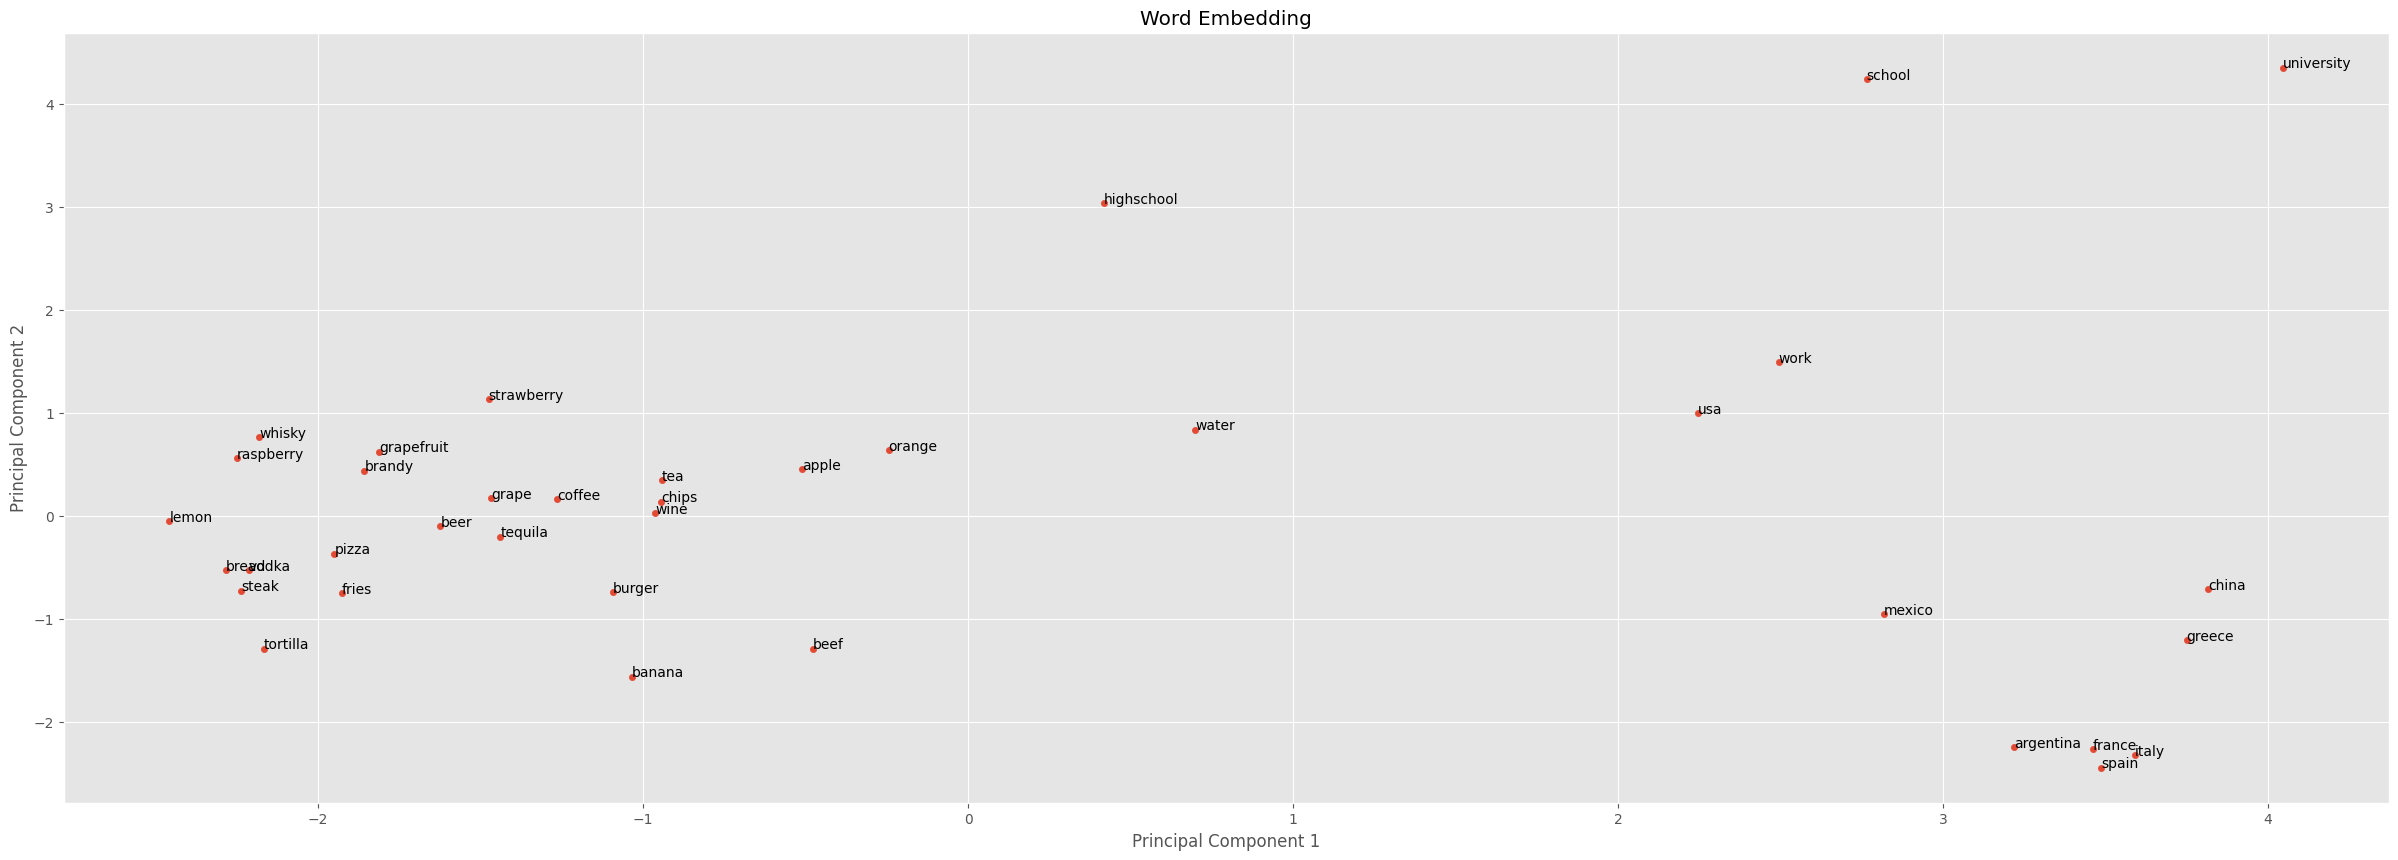

In [12]:
# This is how the PCA embedding looks!
# We can observe that food and drinks are one kind of a cluster, countries are somehow another one
# school, university another one, and highschool and water could be trated as outliers....
plot_embeddings(PATH, words, emb_dim, embeddings_dict, PCA)

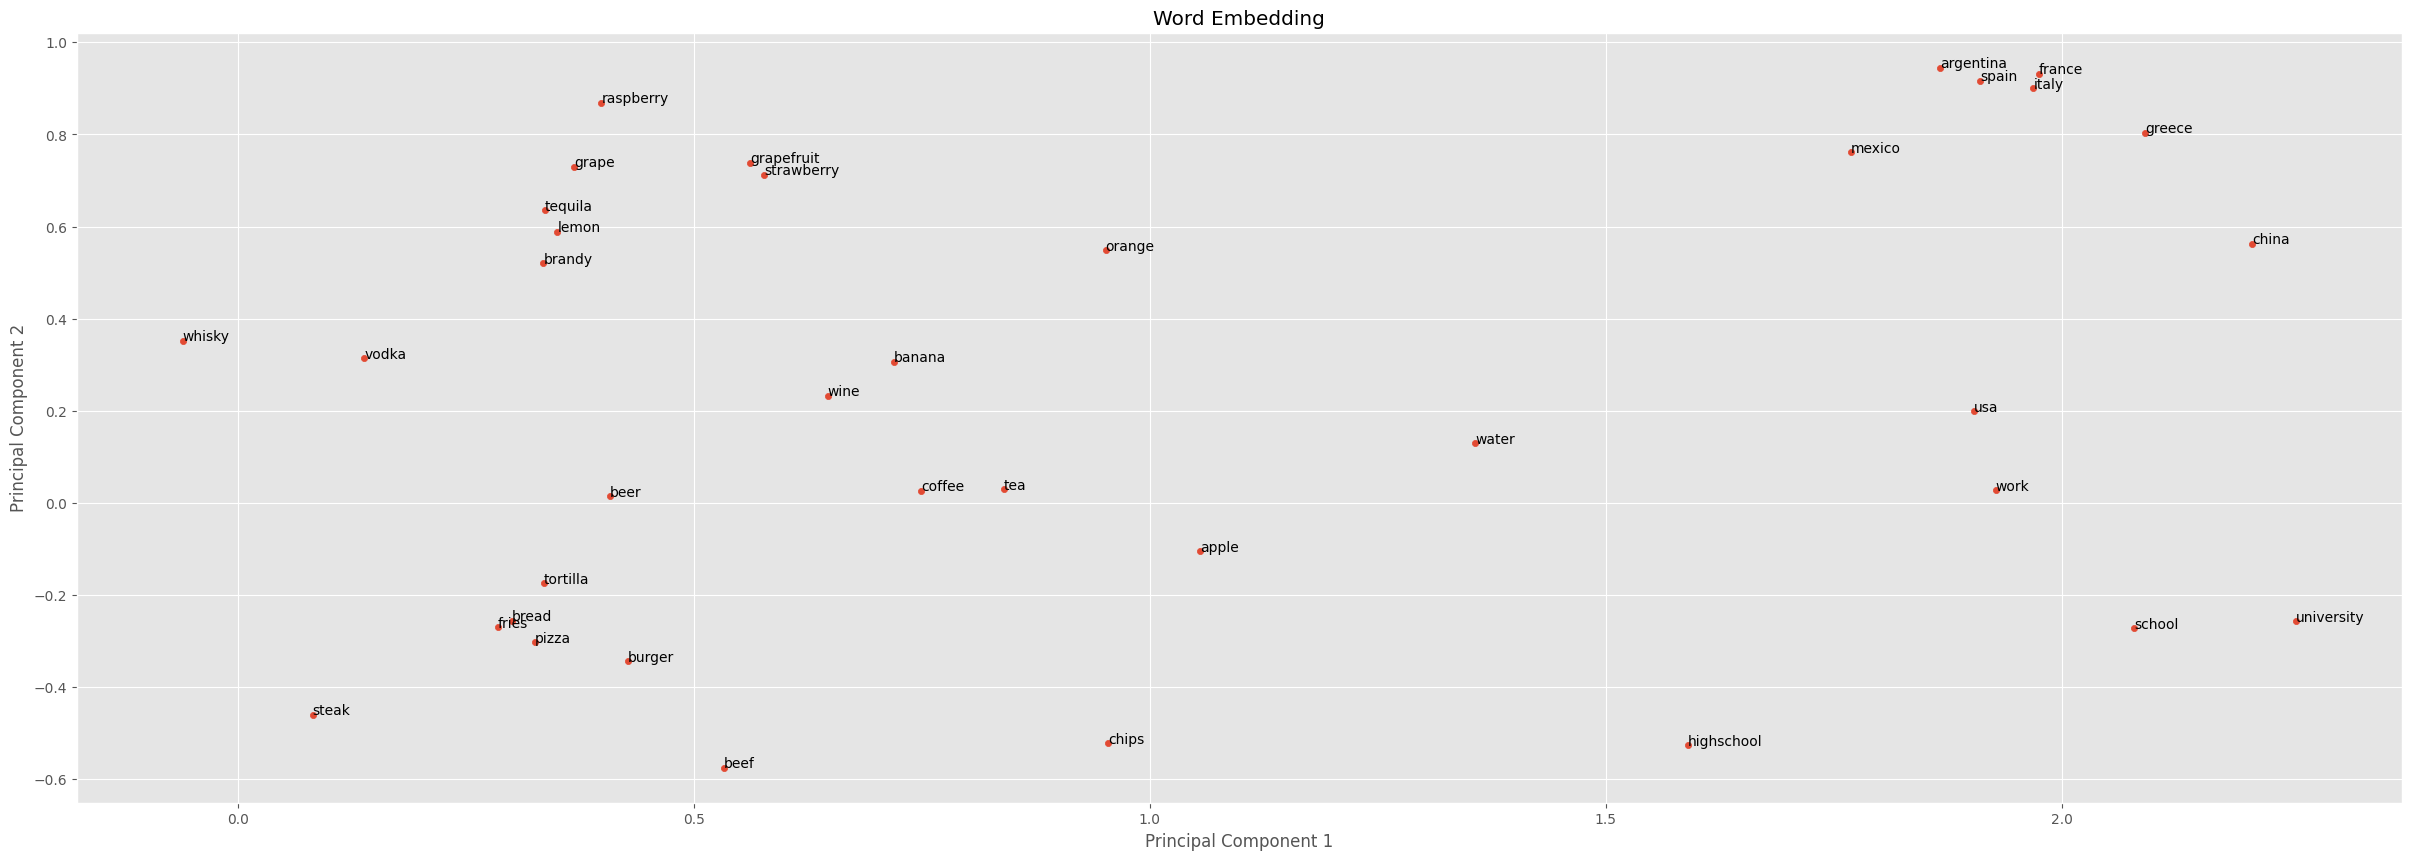

In [19]:
# t-SNE dimensionality reduction for visualization
# Using this other
embeddings = plot_embeddings(PATH, words, emb_dim, embeddings_dict, TSNE)

### Let us compute analogies

In [33]:
# analogy
def analogy(word1, word2, word3, embeddings_dict):
    if word1 not in embeddings_dict or word2 not in embeddings_dict or word3 not in embeddings_dict:
        return []

    # Calculate the analogy vector
    analogy_vector = embeddings_dict[word2] - embeddings_dict[word1] + embeddings_dict[word3]

    # Find the closest words to the analogy vector using cosine similarity
    similarities = {}
    for word in embeddings_dict:
        if word in [word1, word2, word3]:
            continue
        similarity = np.dot(embeddings_dict[word], analogy_vector) / (
            np.linalg.norm(embeddings_dict[word]) * np.linalg.norm(analogy_vector)
        )
        similarities[word] = similarity

    # Return the most significant word matching the 2 analogy first word (in this case "Queen")
    results = sorted(similarities, key=lambda x: similarities[x], reverse=True)[:1]
    analogy_phrase = word1 + " is to -> " + word2 + " as " + word3 + " is to -> " + results[0] 
    #print(analogy_phrase)
    return analogy_phrase    
    pass

In [34]:
analogy('man', 'king', 'woman', embeddings_dict)

'man is to -> king as woman is to -> queen'

In [55]:
# most similar
def find_most_similar(word, embeddings_dict, top_n=10):
    if word not in embeddings_dict:
            return []

    # Calculate cosine similarities between the given word and all other words
    similarities = {}
    word_vector = embeddings_dict[word]
    for other_word in embeddings_dict:
        if other_word == word:
            continue
        other_vector = embeddings_dict[other_word]
        similarity = np.dot(word_vector, other_vector) / (
            np.linalg.norm(word_vector) * np.linalg.norm(other_vector)
        )
        similarities[other_word] = similarity

    # Sort the words by similarity and return the top_n results
    results = sorted(similarities, key=lambda x: similarities[x], reverse=True)[:top_n]

    return results        
    pass

In [56]:
most_similar = find_most_similar('mexico', embeddings_dict, top_n=10)
print(most_similar)

['mexican', 'venezuela', 'colombia', 'peru', 'chile', 'puerto', 'rico', 'cuba', 'guatemala', 'panama']


In [60]:
for i, w in enumerate(most_similar, 1):
    print(f'{i} ---> {w[0:10]}')

1 ---> mexican
2 ---> venezuela
3 ---> colombia
4 ---> peru
5 ---> chile
6 ---> puerto
7 ---> rico
8 ---> cuba
9 ---> guatemala
10 ---> panama
